Hit Or Miss

CV2

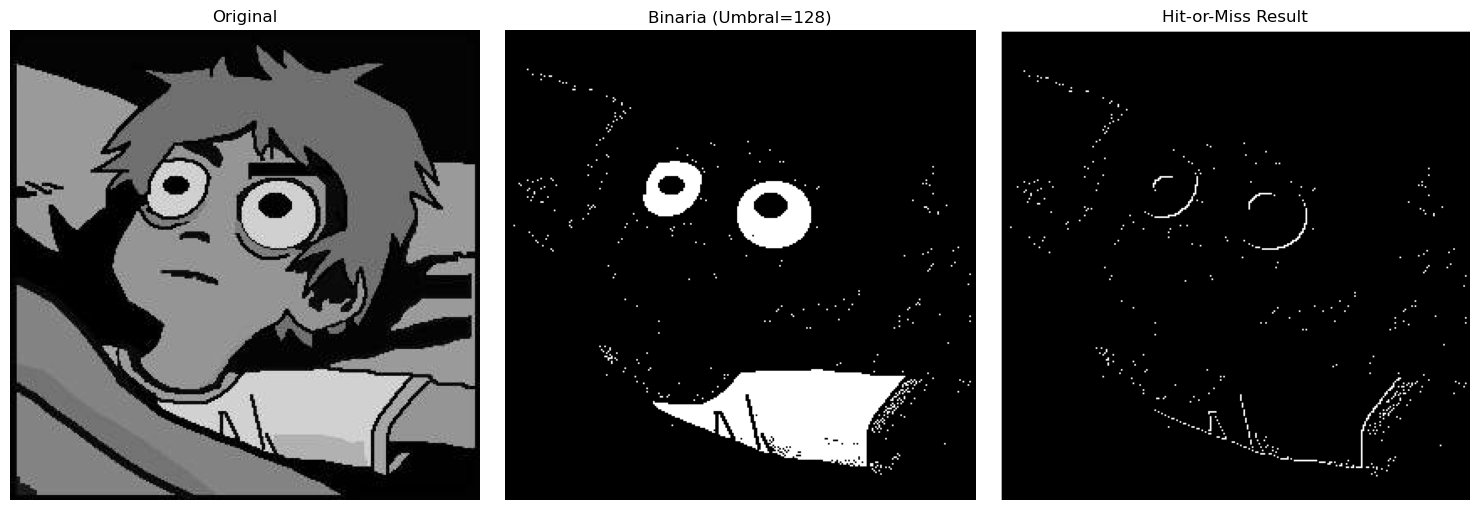

In [ ]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
from skimage import morphology

image = cv2.imread('img.jpg', cv2.IMREAD_GRAYSCALE)
_, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

kernel = np.array((
    [ 1,  0,  0],   
    [ 0, -1,  0],  
    [ 0,  0, -1]   
), dtype="int")

hitmiss_result = cv2.morphologyEx(binary_image, cv2.MORPH_HITMISS, kernel)

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(132)
plt.imshow(binary_image, cmap='gray')
plt.title('Binaria (Umbral=128)')
plt.axis('off')

plt.subplot(133)
plt.imshow(hitmiss_result, cmap='gray')
plt.title('Hit-or-Miss Result')
plt.axis('off')

plt.tight_layout()
plt.show()

SKIMAGE

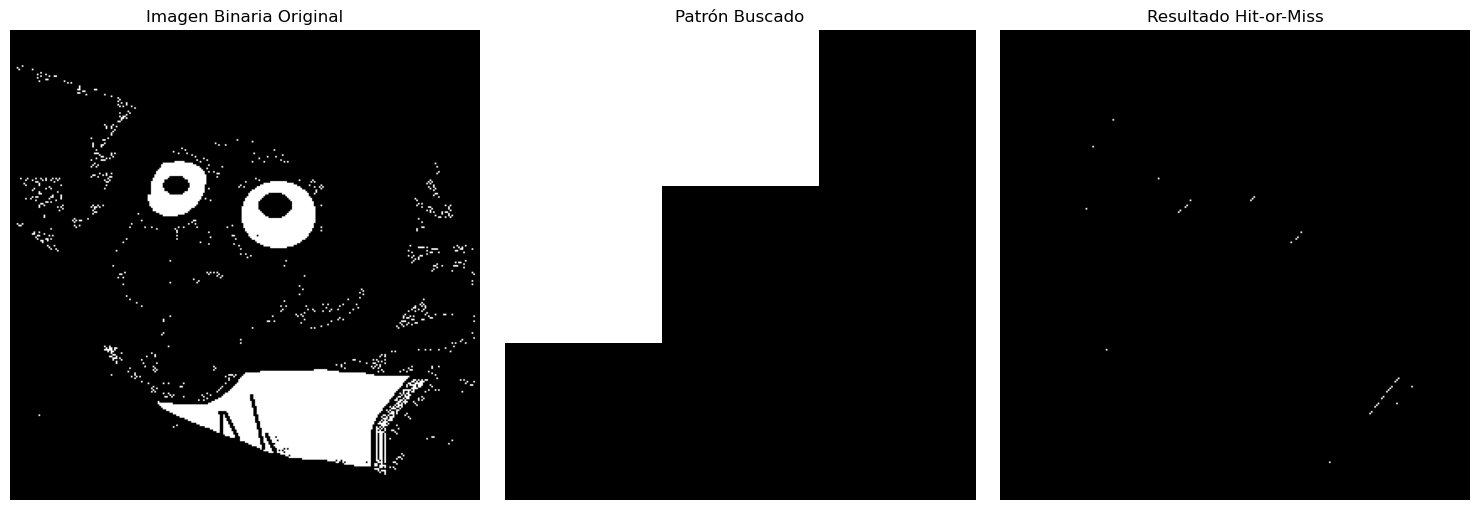

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from scipy.ndimage import binary_hit_or_miss

def hit_or_miss(image_path, pattern_structure, background_structure=None):
    image = io.imread(image_path)
    if len(image.shape) > 2:
        image = color.rgb2gray(image)
    binary_image = image > 0.5  # Umbral para binarizar

    if background_structure is None:
        background_structure = np.logical_not(pattern_structure)

    result = binary_hit_or_miss(binary_image, 
                                structure1=pattern_structure, 
                                structure2=background_structure)

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(binary_image, cmap='gray')
    axes[0].set_title('Imagen Binaria Original')
    axes[0].axis('off')
    
    axes[1].imshow(pattern_structure, cmap='gray')
    axes[1].set_title('Patrón Buscado')
    axes[1].axis('off')
    
    axes[2].imshow(result, cmap='gray')
    axes[2].set_title('Resultado Hit-or-Miss')
    axes[2].axis('off')
    
    plt.tight_layout()
    plt.show()

    return result

pattern = np.array([
    [1, 1, 0],
    [1, 0, 0],
    [0, 0, 0]
], dtype=bool)

resultado = hit_or_miss('img.jpg', pattern)


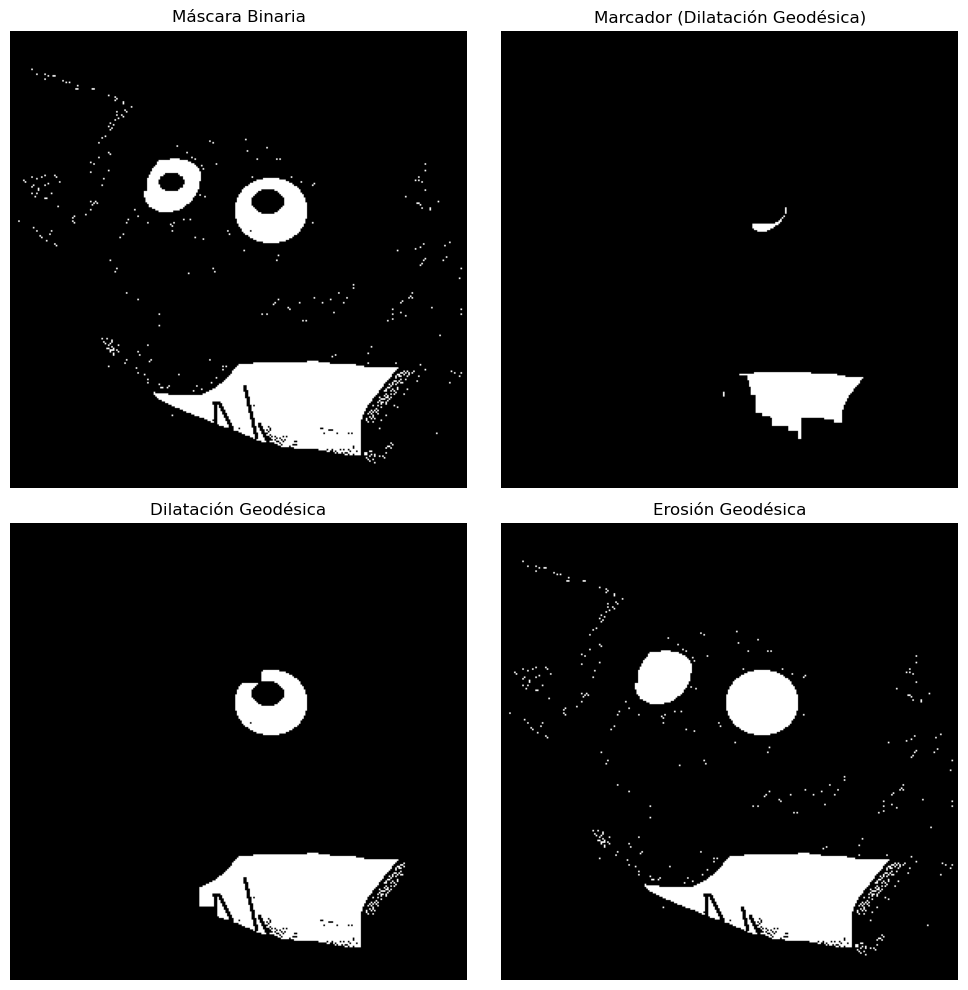

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('img.jpg', cv2.IMREAD_GRAYSCALE)
_, mask = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

kernel = np.ones((5, 5), np.uint8)  
marker_dil = cv2.erode(mask, kernel, iterations=3)  
marker_ero = cv2.dilate(mask, kernel, iterations=3)  

def geodesic_dilation(marker, mask, kernel, iterations=10):
    prev = marker.copy()
    for _ in range(iterations):
        dilated = cv2.dilate(prev, kernel)
        current = np.minimum(dilated, mask)  
        if np.array_equal(current, prev):
            break 
        prev = current
    return current

def geodesic_erosion(marker, mask, kernel, iterations=10):
    prev = marker.copy()
    for _ in range(iterations):
        eroded = cv2.erode(prev, kernel)
        current = np.maximum(eroded, mask)  
        if np.array_equal(current, prev):
            break
        prev = current
    return current

geo_dilated = geodesic_dilation(marker_dil, mask, kernel)
geo_eroded = geodesic_erosion(marker_ero, mask, kernel)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].imshow(mask, cmap='gray')
axes[0, 0].set_title('Máscara Binaria')
axes[0, 0].axis('off')

axes[0, 1].imshow(marker_dil, cmap='gray')
axes[0, 1].set_title('Marcador (Dilatación Geodésica)')
axes[0, 1].axis('off')

axes[1, 0].imshow(geo_dilated, cmap='gray')
axes[1, 0].set_title('Dilatación Geodésica')
axes[1, 0].axis('off')

axes[1, 1].imshow(geo_eroded, cmap='gray')
axes[1, 1].set_title('Erosión Geodésica')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Definir los datos de la matriz de riesgos
data = {
    "ID": ["R1", "R2", "R3", "R4", "R5", "R6", "R7", "R8", "R9", "R10"],
    "Riesgo": [
        "Fallos en el inicio de sesión por sobrecarga",
        "Pérdida de datos por error en reserva/libros",
        "Vulnerabilidades en login o sesiones",
        "Fallas de compatibilidad en dispositivos móviles",
        "Mal uso del sistema por parte de usuarios sin capacitación",
        "Acceso no autorizado a datos administrativos",
        "Fallas en envío de notificaciones",
        "Tiempo de respuesta alto en búsquedas de libros",
        "Integración defectuosa con redes sociales",
        "Incumplimiento de leyes de privacidad (GDPR)"
    ],
    "Probabilidad": ["Media", "Baja", "Alta", "Media", "Alta", "Media", "Media", "Alta", "Baja", "Media"],
    "Impacto": ["Alta", "Alta", "Alta", "Media", "Media", "Alta", "Media", "Media", "Baja", "Alta"],
    "Nivel de Riesgo": ["Alta", "Media", "Crítica", "Media", "Media", "Alta", "Media", "Alta", "Baja", "Alta"],
    "Estrategia de Mitigación": [
        "Implementar control de concurrencia y pruebas de carga",
        "Uso de transacciones y backups automáticos",
        "Autenticación segura, cifrado y pruebas de seguridad",
        "Pruebas multiplataforma, diseño responsivo",
        "Capacitación, manuales y validación de entradas",
        "Control de roles y permisos, auditoría de acciones",
        "Logs de notificaciones, reintentos y alertas internas",
        "Optimización de consultas y uso de índices",
        "Uso de APIs oficiales, validación previa en desarrollo",
        "Aplicar políticas de privacidad, consentimiento y anonimización"
    ],
    "Responsable": [
        "Equipo Backend", "DBA / Dev Backend", "Dev Seguridad", "Dev Frontend", "Soporte/UX",
        "Dev Seguridad", "Dev Backend", "Dev Backend / DBA", "Dev Frontend", "Legal / Dev Seguridad"
    ]
}

# Crear el DataFrame
df_riesgos = pd.DataFrame(data)

# Guardar en un archivo Excel
excel_path = "/mnt/data/Matriz_Riesgos_Modulo_Web.xlsx"
df_riesgos.to_excel(excel_path, index=False)

excel_path
